In [8]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from scipy.optimize import minimize

plt.savefig('1.pgf')
plt.show()

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

/tmp/ipykernel_51919/844625569.py:8: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


<Figure size 432x288 with 0 Axes>

In [9]:
def read_files(files):
    ret = []
    for f in files:
        ret += [pd.read_csv(f)]
    return ret

In [10]:
geig, cam = read_files(['tab1.csv', 'tab2.csv'])

In [18]:
def sigmoid(par, x):
    return par[0]/(1 + np.exp(par[1]*(x-par[2])))

def sigmoid_der(par, x):
    return par[0]*par[1]*np.exp(par[1]*(x-par[2]))/(1+np.exp(par[1]*(x-par[2])))**2

In [19]:
def fit(f, params, x, y):
    def err(par, x_, y_):
        y1 = f(par, x_)
        return np.sum((y1-y_)**2)
    
    return minimize(err, params, args=(x, y)).x

[14.20390255  2.70750628  8.11588496]


/tmp/ipykernel_51919/3898094939.py:21: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


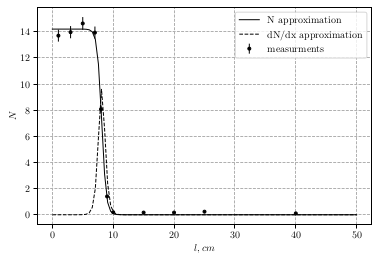

In [56]:
geig['N1'] = geig['N'] / geig['t']
delta_N = 0.5 * geig['N'] / geig['t']**2
par = np.array([0, 0, 0])
par = fit(sigmoid, par, geig['l'], geig['N1'])
print(par)

x = np.linspace(0, 50, num=100)
plt.plot(x, sigmoid(par, x), 'k', linewidth=1, label='N approximation')
plt.plot(x, sigmoid_der(par, x), 'k--', linewidth=1, label='dN/dx approximation')

plt.errorbar(geig['l'], geig['N1'], fmt='k.', yerr=delta_N*2, linewidth=1, label='measurments')

# plt.plot(calib['barrel'], calib['lambda'], '.', linewidth=1, label='calibration points')

plt.grid(linestyle='--')
plt.xlabel('$l, mm$')
plt.ylabel('$N$')
plt.legend()

plt.savefig('geig.pgf')
plt.show()

In [54]:
print(geig.to_latex())
print(delta_N)

\begin{tabular}{lrrrr}
\toprule
{} &   l &    N &    t &         N1 \\
\midrule
0  &  10 &   14 &   72 &   0.194444 \\
1  &   5 &  439 &   30 &  14.633333 \\
2  &   1 &  411 &   30 &  13.700000 \\
3  &   8 &  242 &   30 &   8.066667 \\
4  &   9 &   42 &   30 &   1.400000 \\
5  &  40 &   12 &  113 &   0.106195 \\
6  &   3 &  419 &   30 &  13.966667 \\
7  &   7 &  418 &   30 &  13.933333 \\
8  &  15 &   18 &  107 &   0.168224 \\
9  &  20 &   18 &  107 &   0.168224 \\
10 &  25 &   22 &   93 &   0.236559 \\
\bottomrule
\end{tabular}

0     0.001350
1     0.243889
2     0.228333
3     0.134444
4     0.023333
5     0.000470
6     0.232778
7     0.232222
8     0.000786
9     0.000786
10    0.001272
dtype: float64


/tmp/ipykernel_51919/2457023802.py:27: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


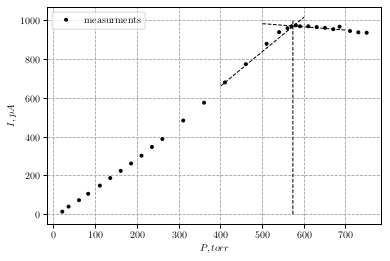

In [51]:
plt.plot(cam['P'], cam['I'], 'k.', linewidth=1, label='measurments')

# plt.plot(calib['barrel'], calib['lambda'], '.', linewidth=1, label='calibration points')

p1 = cam['P'][cam['P'] < 550]
p2 = cam['P'][cam['P'] > 550]

i1 = cam['I'][cam['P'] < 550]
i2 = cam['I'][cam['P'] > 550]

poly, cov = np.polyfit(p1, i1, 1, cov=True)
x1 = np.linspace(400, 600, num=100)
plt.plot(x1, np.polyval(poly, x1), 'k--', linewidth=1)

poly, cov = np.polyfit(p2, i2, 1, cov=True)
x2 = np.linspace(500, 700, num=100)
plt.plot(x2, np.polyval(poly, x2), 'k--', linewidth=1)

plt.plot([573, 573], [1000, 0], 'k--', linewidth=1)

plt.grid(linestyle='--')
plt.xlabel('$P, torr$')
plt.ylabel('$I, pA$')
plt.legend()

plt.savefig('cam.pgf')
plt.show()

In [55]:
print(cam.to_latex())

\begin{tabular}{lrr}
\toprule
{} &    P &    I \\
\midrule
0  &   20 &   16 \\
1  &   35 &   42 \\
2  &   60 &   75 \\
3  &   82 &  108 \\
4  &  110 &  150 \\
5  &  135 &  189 \\
6  &  160 &  226 \\
7  &  185 &  264 \\
8  &  210 &  304 \\
9  &  235 &  349 \\
10 &  260 &  390 \\
11 &  310 &  485 \\
12 &  360 &  577 \\
13 &  410 &  681 \\
14 &  460 &  775 \\
15 &  510 &  880 \\
16 &  560 &  960 \\
17 &  610 &  970 \\
18 &  590 &  970 \\
19 &  540 &  940 \\
20 &  580 &  975 \\
21 &  570 &  970 \\
22 &  670 &  955 \\
23 &  650 &  962 \\
24 &  630 &  966 \\
25 &  685 &  968 \\
26 &  710 &  946 \\
27 &  730 &  939 \\
28 &  750 &  937 \\
\bottomrule
\end{tabular}

